# CREDIT CARD APPROVAL - PREDICTION

                                                                         
                                                                         PREPARED BY:
                                                                             SHIVARAG M
                                                                             BLESSON XAVIER
                                                                             AGILAN A

Context

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted
by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide 
whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations. Past models may lose their original predictive power. Logistic model is a common method for credit scoring. Because Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. In order to facilitate understanding and operation, the score card will multiply the logistic regression coefficient by a certain value (such as 100) and round it.

#### Problem Statement (Task)



Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition
of 'good' or 'bad' is not given.

Also, unbalance data problem is a big problem in this task.

##### Importing Pandas

Pandas is usually imported under the pd alias. 

alias: 
    In Python alias are an alternate name for referring to the same thing.
    
    Now the Pandas package can be referred to as pd instead of pandas .
    

In [1]:
import pandas as pd

#### Read csv with Python

The pandas function read_csv() reads in values, where the delimiter is a comma character.

And save the application and record in df_applications and df_records respectively

In [2]:
df_applications= pd.read_csv("application_record.csv")
df_record = pd.read_csv("credit_record.csv")

#### Shape and preview

Finding the shape of the application dataset and head() means to display the first 5 rows of the same dataset

In [3]:
print('Application record df shape:', df_applications.shape)
df_applications.head()

Application record df shape: (438557, 18)


ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

Looking the application dataset to find out the applicants whose gender is male.

In [4]:
df_applications[df_applications.CODE_GENDER == "M"]

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
10      5008815           M            Y               Y             0   
11      5112956           M            Y               Y             0   
...         ...         ...          ...             ...           ...   
438541  6837707           M            N               Y             0   
438542  6837905           M            Y               Y             1   
438543  6837906           M            Y               Y             1   
438548  6839936           M            Y               Y             1   
438552  6840104           M            N               Y             0   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0          Working               Higher education   
1               427500.0          Working               Higher education   
2               112500.0          Working  Secondary / secondary special   
10              270000.0          Working               Higher education   
11              270000.0          Working               Higher education   
...                  ...              ...                            ...   
438541          202500.0          Working               Higher education   
438542          355050.0          Working  Secondary / secondary special   
438543          355050.0          Working  Secondary / secondary special   
438548          135000.0          Working  Secondary / secondary special   
438552          135000.0        Pensioner  Secondary / secondary special   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0          Civil marriage   Rented apartment      -12005          -4542   
1          Civil marriage   Rented apartment      -12005          -4542   
2                 Married  House / apartment      -21474          -1134   
10                Married  House / apartment      -16872           -769   
11                Married  House / apartment      -16872           -769   
...                   ...                ...         ...            ...   
438541     Civil marriage  House / apartment      -13510          -2309   
438542            Married  House / apartment      -15904          -2614   
438543            Married  House / apartment      -15904          -2614   
438548            Married  House / apartment      -12569          -2095   
438552          Separated  House / apartment      -22717         365243   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                1                1           0           0             NaN   
1                1                1           0           0             NaN   
2                1                0           0           0  Security staff   
10               1                1           1           1     Accountants   
11               1                1           1           1     Accountants   
...            ...              ...         ...         ...             ...   
438541           1                1           0           0        Laborers   
438542           1                0           0           0             NaN   
438543           1                0           0           0             NaN   
438548           1                0           0           0        Laborers   
438552           1                0           0           0             NaN   

        CNT_FAM_MEMBERS  
0                   2.0  
1                   2.0  
2                   2.0  
10                  2.0  
11                  2.0  
...                 ...  
438541              2.0  
438542              3.0  
438543              3.0  
438548              3.0  
438552              1.0  

[144117 rows x 18 columns]

Looking the application dataset to find out the applicants whose gender is Male and has his own car.

In [5]:
df_applications[(df_applications.CODE_GENDER == "M") & (df_applications['FLAG_OWN_CAR'] == "Y")]

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
10      5008815           M            Y               Y             0   
11      5112956           M            Y               Y             0   
...         ...         ...          ...             ...           ...   
438519  6836039           M            Y               N             0   
438539  6837454           M            Y               Y             1   
438542  6837905           M            Y               Y             1   
438543  6837906           M            Y               Y             1   
438548  6839936           M            Y               Y             1   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0          Working               Higher education   
1               427500.0          Working               Higher education   
2               112500.0          Working  Secondary / secondary special   
10              270000.0          Working               Higher education   
11              270000.0          Working               Higher education   
...                  ...              ...                            ...   
438519          157500.0          Working               Higher education   
438539          162000.0    State servant  Secondary / secondary special   
438542          355050.0          Working  Secondary / secondary special   
438543          355050.0          Working  Secondary / secondary special   
438548          135000.0          Working  Secondary / secondary special   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0          Civil marriage   Rented apartment      -12005          -4542   
1          Civil marriage   Rented apartment      -12005          -4542   
2                 Married  House / apartment      -21474          -1134   
10                Married  House / apartment      -16872           -769   
11                Married  House / apartment      -16872           -769   
...                   ...                ...         ...            ...   
438519            Married  House / apartment      -11619          -4149   
438539            Married  House / apartment      -10890          -2675   
438542            Married  House / apartment      -15904          -2614   
438543            Married  House / apartment      -15904          -2614   
438548            Married  House / apartment      -12569          -2095   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                1                1           0           0             NaN   
1                1                1           0           0             NaN   
2                1                0           0           0  Security staff   
10               1                1           1           1     Accountants   
11               1                1           1           1     Accountants   
...            ...              ...         ...         ...             ...   
438519           1                0           0           0      Core staff   
438539           1                0           0           0      Core staff   
438542           1                0           0           0             NaN   
438543           1                0           0           0             NaN   
438548           1                0           0           0        Laborers   

        CNT_FAM_MEMBERS  
0                   2.0  
1                   2.0  
2                   2.0  
10                  2.0  
11                  2.0  
...                 ...  
438519              2.0  
438539              3.0  
438542              3.0  
438543              3.0  
438548              3.0  

[88102 rows x 18 columns]

Looking the application dataset to find out the applicants who is Male and has his own Car.

Also his income type ie; the Working employee and the family status ie; Married .

In [6]:
df_applications[(df_applications.CODE_GENDER == "M") & (df_applications['FLAG_OWN_CAR'] == "Y") & (df_applications['NAME_INCOME_TYPE'] == "Working") & (df_applications['NAME_FAMILY_STATUS'] == "Married")]

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
2       5008806           M            Y               Y             0   
10      5008815           M            Y               Y             0   
11      5112956           M            Y               Y             0   
12      6153651           M            Y               Y             0   
27      5008836           M            Y               Y             3   
...         ...         ...          ...             ...           ...   
438518  6835982           M            Y               Y             0   
438519  6836039           M            Y               N             0   
438542  6837905           M            Y               Y             1   
438543  6837906           M            Y               Y             1   
438548  6839936           M            Y               Y             1   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
2               112500.0          Working  Secondary / secondary special   
10              270000.0          Working               Higher education   
11              270000.0          Working               Higher education   
12              270000.0          Working               Higher education   
27              270000.0          Working  Secondary / secondary special   
...                  ...              ...                            ...   
438518          135000.0          Working              Incomplete higher   
438519          157500.0          Working               Higher education   
438542          355050.0          Working  Secondary / secondary special   
438543          355050.0          Working  Secondary / secondary special   
438548          135000.0          Working  Secondary / secondary special   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
2                 Married  House / apartment      -21474          -1134   
10                Married  House / apartment      -16872           -769   
11                Married  House / apartment      -16872           -769   
12                Married  House / apartment      -16872           -769   
27                Married  House / apartment      -12689          -1163   
...                   ...                ...         ...            ...   
438518            Married  House / apartment      -15293          -5244   
438519            Married  House / apartment      -11619          -4149   
438542            Married  House / apartment      -15904          -2614   
438543            Married  House / apartment      -15904          -2614   
438548            Married  House / apartment      -12569          -2095   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
2                1                0           0           0  Security staff   
10               1                1           1           1     Accountants   
11               1                1           1           1     Accountants   
12               1                1           1           1     Accountants   
27               1                0           0           0        Laborers   
...            ...              ...         ...         ...             ...   
438518           1                1           1           0             NaN   
438519           1                0           0           0      Core staff   
438542           1                0           0           0             NaN   
438543           1                0           0           0             NaN   
438548           1                0           0           0        Laborers   

        CNT_FAM_MEMBERS  
2                   2.0  
10                  2.0  
11                  2.0  
12                  2.0  
27                  5.0  
...                 ...  
438518              2.0  
438519              2.0  
438542              3.0  
438543              3.0  
438548              3.0  

[41270 rows x 18 columns]

#### isna() is the not available values in a dataset.

Here we are taking the not available values in application dataset and accordingly we are finding the overall sum of the NA values.


In [7]:
df_applications.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

### Data Cleaning

#### Fill Missing Value
NA values are only in the 'OCCUPATION_TYPE' column of the application dataset and so we have to fill the missing values using fillna()

In [8]:
df_applications['OCCUPATION_TYPE'].fillna(value='Other', inplace=True)

#### Importing numpy
NumPy is a general-purpose array-processing package. 

It provides a high-performance multidimensional array object, and tools for working with these arrays.

It is the fundamental package for scientific computing with Python.

In [9]:
import numpy as np

##### Looking for duplicate values in df_applications

In [10]:
print(f'Duplicates in df_applications: {df_applications.iloc[:,1:].duplicated().sum()}, ({np.round(100*df_applications.iloc[:,1:].duplicated().sum()/len(df_applications),1)}%)')
print('')

Duplicates in df_applications: 348472, (79.5%)



##### Droping the unwanted duplicate values from df_applications dataset

In [11]:
df_applications=df_applications.drop_duplicates(subset=df_applications.columns[1:], keep='first')

##### Drop constant feature('FLAG_MOBIL' is not useful for our model)

In [12]:
df_applications.drop('FLAG_MOBIL', axis=1, inplace=True)

##### Looking the dtypes of df_applications

A data type object (an instance of numpy. dtype class) describes how the bytes in the fixed-size block of memory corresponding to an array item should be interpreted. 

It describes the following aspects of the data: Type of the data (integer, float, Python object, etc.)

In [13]:
df_applications.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

Changing the type of "CNT_FAM_MEMBERS" and "AMT_INCOME_TOTAL" in  df_applications to integer values.

In [14]:
df_applications = df_applications.astype({"CNT_FAM_MEMBERS":'int', "AMT_INCOME_TOTAL":'int'}) 

In [15]:
df_applications.dtypes

ID                      int64
CODE_GENDER            object
FLAG_OWN_CAR           object
FLAG_OWN_REALTY        object
CNT_CHILDREN            int64
AMT_INCOME_TOTAL        int32
NAME_INCOME_TYPE       object
NAME_EDUCATION_TYPE    object
NAME_FAMILY_STATUS     object
NAME_HOUSING_TYPE      object
DAYS_BIRTH              int64
DAYS_EMPLOYED           int64
FLAG_WORK_PHONE         int64
FLAG_PHONE              int64
FLAG_EMAIL              int64
OCCUPATION_TYPE        object
CNT_FAM_MEMBERS         int32
dtype: object

In [16]:
df_applications.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0   5008804           M            Y               Y             0   
2   5008806           M            Y               Y             0   
3   5008808           F            N               Y             0   
7   5008812           F            N               Y             0   
10  5008815           M            Y               Y             0   

    AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0             427500               Working               Higher education   
2             112500               Working  Secondary / secondary special   
3             270000  Commercial associate  Secondary / secondary special   
7             283500             Pensioner               Higher education   
10            270000               Working               Higher education   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         Civil marriage   Rented apartment      -12005          -4542   
2                Married  House / apartment      -21474          -1134   
3   Single / not married  House / apartment      -19110          -3051   
7              Separated  House / apartment      -22464         365243   
10               Married  House / apartment      -16872           -769   

    FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  
0                 1           0           0           Other                2  
2                 0           0           0  Security staff                2  
3                 0           1           1     Sales staff                1  
7                 0           0           0           Other                1  
10                1           1           1     Accountants                2

##### Importing libraries

The import seaborn portion of the code tells Python to bring the Seaborn library into your current environment. 
The as sns portion of the code then tells Python to give Seaborn the alias of sns. 
This allows you to use Seaborn functions by simply typing sns. function_name rather than seaborn.

matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. 
Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area 
in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In matplotlib.

Use the filterwarnings() Function to Suppress Warnings in Python. 
The warnings module handles warnings in Python. We can show warnings raised by the user with the warn() function. 
We can use the filterwarnings() function to perform actions on specific warnings.

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis (EDA)

#### Boxplot
The seaborn boxplot is a very basic plot Boxplots are used to visualize distributions.
Thats very useful when you want to compare data between two groups.
Sometimes a boxplot is named a box-and-whisker plot. 
Any box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.

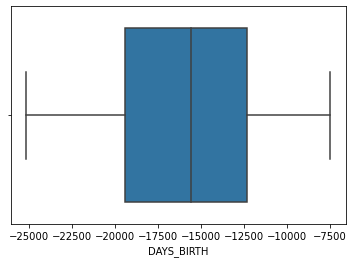

In [18]:
sns.boxplot(df_applications.DAYS_BIRTH)
plt.show()

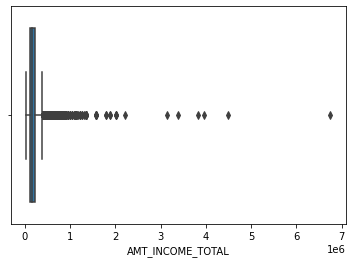

In [19]:
sns.boxplot(df_applications.AMT_INCOME_TOTAL)
plt.show()

##### Finding the Q1 , Q3 , IQR , Upper limit , Lower limit of the boxplot

In [20]:
Q1,Q3 = np.percentile(df_applications.AMT_INCOME_TOTAL,[25,75])
print(Q1)
print(Q3)
IQR = Q3-Q1
print(IQR)
Upper_limit = Q3+1.5*IQR
print(Upper_limit)
Lower_limit = Q1-1.5*IQR
print(Lower_limit)

112500.0
225000.0
112500.0
393750.0
-56250.0


##### Outlier treatment of 'AMT_INCOME_TOTAL' in boxplot

In [21]:
q1_AMT_INCOME_TOTAL= df_applications['AMT_INCOME_TOTAL'].quantile(0.25)
q3_AMT_INCOME_TOTAL= df_applications['AMT_INCOME_TOTAL'].quantile(0.75)

iqr_AMT_INCOME_TOTAL= q3_AMT_INCOME_TOTAL - q1_AMT_INCOME_TOTAL
iqr_AMT_INCOME_TOTAL

df_applications= df_applications[df_applications.AMT_INCOME_TOTAL < ((q1_AMT_INCOME_TOTAL + 1.5*iqr_AMT_INCOME_TOTAL))]

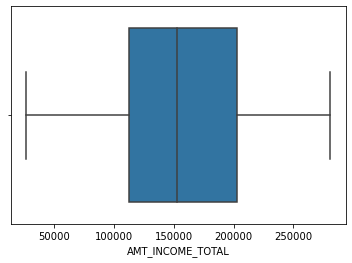

In [22]:
sns.boxplot(df_applications.AMT_INCOME_TOTAL)
plt.show()

##### Histogram plot for 'NAME_INCOME_TYPE'

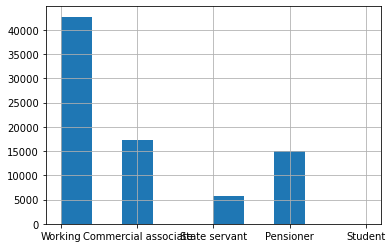

In [23]:
df_applications['NAME_INCOME_TYPE'].hist()
plt.show()

##### Histogram plot for 'NAME_FAMILY_STATUS'

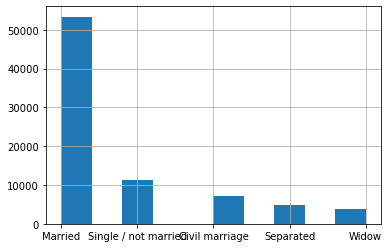

In [24]:
df_applications['NAME_FAMILY_STATUS'].hist()
plt.show()

##### Histogram plot for 'NAME_HOUSING_TYPE'

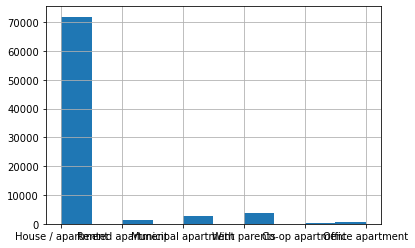

In [30]:
df_applications['NAME_HOUSING_TYPE'].hist()
plt.show()

##### Total number of values in column NAME_HOUSING_TYPE

In [31]:
df_applications.NAME_HOUSING_TYPE.value_counts()

House / apartment      71854
With parents            3842
Municipal apartment     2764
Rented apartment        1217
Office apartment         662
Co-op apartment          265
Name: NAME_HOUSING_TYPE, dtype: int64

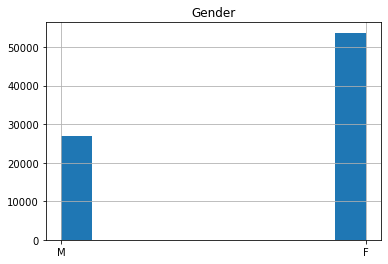

In [32]:
df_applications['CODE_GENDER'].hist()
plt.title("Gender")
plt.show()

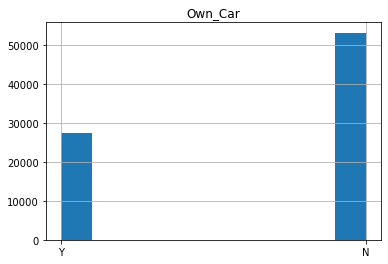

In [33]:
df_applications['FLAG_OWN_CAR'].hist()
plt.title("Own_Car")
plt.show()

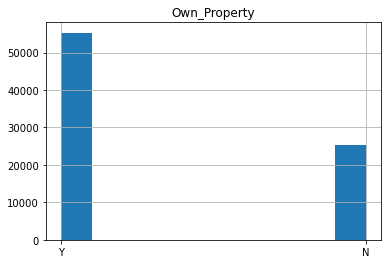

In [34]:
df_applications['FLAG_OWN_REALTY'].hist()
plt.title("Own_Property")
plt.show()

PyLab is a convenience module that bulk imports matplotlib. 
pyplot (for plotting) and NumPy (for Mathematics and working with arrays) in a single name space.

rcParams is a matplotlib. RcParams object, it is a dictionary-like variable which store some rc settings in matplotlib

In [35]:
from pylab import rcParams

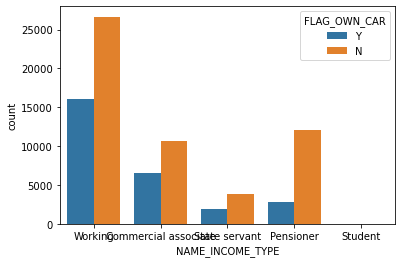

In [36]:
sns.countplot(x='NAME_INCOME_TYPE',hue='FLAG_OWN_CAR',data=df_applications)
rcParams['figure.figsize'] = 25, 10

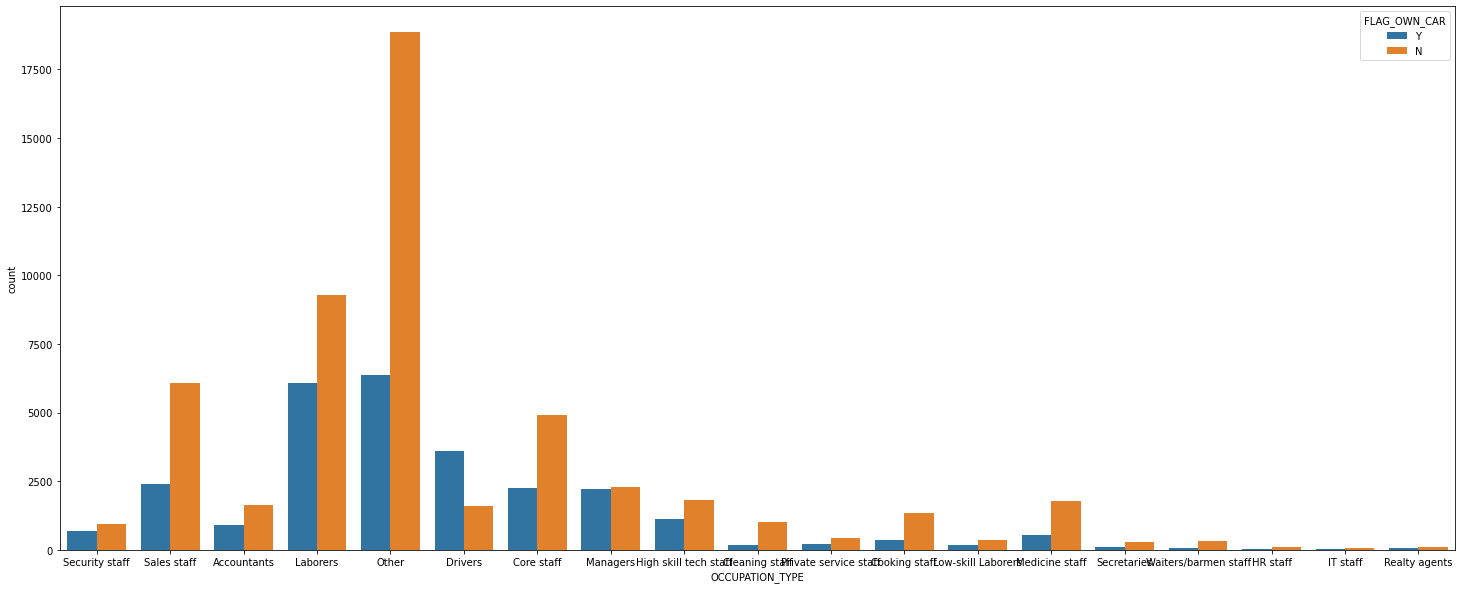

In [37]:
sns.countplot(x='OCCUPATION_TYPE',hue='FLAG_OWN_CAR',data=df_applications)
plt.show()

(19.95, 24.9]    0.035743
(24.9, 29.8]     0.114548
(29.8, 34.7]     0.135924
(34.7, 39.6]     0.140589
(39.6, 44.5]     0.132897
(44.5, 49.4]     0.112439
(49.4, 54.3]     0.112004
(54.3, 59.2]     0.106459
(59.2, 64.1]     0.090827
(64.1, 69.0]     0.018572
Name: Age, dtype: float64


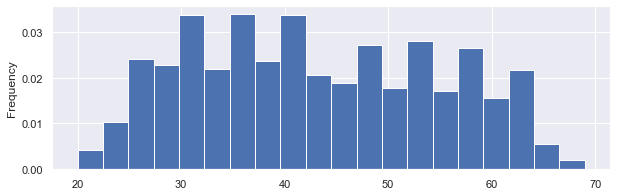

In [38]:
sns.set(rc={'figure.figsize':(10,3)})
df_applications['Age']=-(df_applications['DAYS_BIRTH'])//365	
print(df_applications['Age'].value_counts(bins=10,normalize=True,sort=False))
df_applications['Age'].plot(kind='hist',bins=20,density=True)
plt.show()

### Feature Engineering

#### Creating Dummy Variables

Replacing the categorical values in columns 'CODE_GENDER' , 'FLAG_OWN_CAR' , 'FLAG_OWN_REALTY' to numeric value(binary)

In [39]:
df_applications['CODE_GENDER'].replace('M',1,inplace=True)
df_applications['CODE_GENDER'].replace('F',0,inplace=True)
df_applications['FLAG_OWN_CAR'].replace('Y',1,inplace=True)
df_applications['FLAG_OWN_CAR'].replace('N',0,inplace=True)
df_applications['FLAG_OWN_REALTY'].replace('Y',1,inplace=True)
df_applications['FLAG_OWN_REALTY'].replace('N',0,inplace=True)

Changing the type of 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE' columns of df_applications into category

In [40]:
df_applications['NAME_INCOME_TYPE'] = df_applications['NAME_INCOME_TYPE'].astype('category')
df_applications['NAME_EDUCATION_TYPE'] = df_applications['NAME_EDUCATION_TYPE'].astype('category')
df_applications['NAME_FAMILY_STATUS'] = df_applications['NAME_FAMILY_STATUS'].astype('category')
df_applications['NAME_HOUSING_TYPE'] = df_applications['NAME_HOUSING_TYPE'].astype('category')
df_applications['OCCUPATION_TYPE'] = df_applications['OCCUPATION_TYPE'].astype('category')

In [41]:
df_applications.dtypes

ID                        int64
CODE_GENDER               int64
FLAG_OWN_CAR              int64
FLAG_OWN_REALTY           int64
CNT_CHILDREN              int64
AMT_INCOME_TOTAL          int32
NAME_INCOME_TYPE       category
NAME_EDUCATION_TYPE    category
NAME_FAMILY_STATUS     category
NAME_HOUSING_TYPE      category
DAYS_BIRTH                int64
DAYS_EMPLOYED             int64
FLAG_WORK_PHONE           int64
FLAG_PHONE                int64
FLAG_EMAIL                int64
OCCUPATION_TYPE        category
CNT_FAM_MEMBERS           int32
Age                       int64
dtype: object

In [42]:
df_record.head()

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

In [43]:
df_record.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [44]:
df=pd.merge(df_applications,df_record,on='ID')

In [45]:
df.head()

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008806            1             1                1             0   
1  5008806            1             1                1             0   
2  5008806            1             1                1             0   
3  5008806            1             1                1             0   
4  5008806            1             1                1             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0            112500          Working  Secondary / secondary special   
1            112500          Working  Secondary / secondary special   
2            112500          Working  Secondary / secondary special   
3            112500          Working  Secondary / secondary special   
4            112500          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0            Married  House / apartment      -21474          -1134   
1            Married  House / apartment      -21474          -1134   
2            Married  House / apartment      -21474          -1134   
3            Married  House / apartment      -21474          -1134   
4            Married  House / apartment      -21474          -1134   

   FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                0           0           0  Security staff                2   
1                0           0           0  Security staff                2   
2                0           0           0  Security staff                2   
3                0           0           0  Security staff                2   
4                0           0           0  Security staff                2   

   Age  MONTHS_BALANCE STATUS  
0   58               0      C  
1   58              -1      C  
2   58              -2      C  
3   58              -3      C  
4   58              -4      C

In [47]:
df.describe()

ID    CODE_GENDER   FLAG_OWN_CAR  FLAG_OWN_REALTY  \
count  1.940800e+05  194080.000000  194080.000000    194080.000000   
mean   5.076291e+06       0.328833       0.348696         0.653854   
std    4.064773e+04       0.469791       0.476559         0.475742   
min    5.008806e+06       0.000000       0.000000         0.000000   
25%    5.037091e+06       0.000000       0.000000         0.000000   
50%    5.069200e+06       0.000000       0.000000         1.000000   
75%    5.113011e+06       1.000000       1.000000         1.000000   
max    5.150479e+06       1.000000       1.000000         1.000000   

        CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  DAYS_EMPLOYED  \
count  194080.000000     194080.000000  194080.000000  194080.000000   
mean        0.409862     156248.709068  -16265.082306   66812.839314   
std         0.768847      56544.260277    4217.822433  143983.740302   
min         0.000000      27000.000000  -25152.000000  -15713.000000   
25%         0.000000     112500.000000  -19818.000000   -3079.250000   
50%         0.000000     157500.000000  -15909.000000   -1444.000000   
75%         1.000000     202500.000000  -12724.000000    -302.000000   
max        19.000000     279000.000000   -7489.000000  365243.000000   

       FLAG_WORK_PHONE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  \
count    194080.000000  194080.000000  194080.000000    194080.000000   
mean          0.226654       0.287077       0.077623         2.173784   
std           0.418668       0.452399       0.267578         0.927853   
min           0.000000       0.000000       0.000000         1.000000   
25%           0.000000       0.000000       0.000000         2.000000   
50%           0.000000       0.000000       0.000000         2.000000   
75%           0.000000       1.000000       0.000000         3.000000   
max           1.000000       1.000000       1.000000        20.000000   

                 Age  MONTHS_BALANCE  
count  194080.000000   194080.000000  
mean       44.056502      -19.753684  
std        11.557851       14.198742  
min        20.000000      -60.000000  
25%        34.000000      -30.000000  
50%        43.000000      -17.000000  
75%        54.000000       -8.000000  
max        68.000000        0.000000

In [48]:
df['STATUS'].unique()

array(['C', 'X', '0', '1', '2', '5', '4', '3'], dtype=object)

In [49]:
def status(s):
    if s == "C":
        return 0
    elif s == "X":
        return 0
    elif s == '0':
        return 0
    elif s == '1':
        return 0
    elif s == '2':
        return 1
    elif s == '3':
        return 1
    elif s == '4':
        return 1
    elif s == '5':
        return 1

In [50]:
df['STATUS'] = df['STATUS'].apply(lambda x:status(x))

In [51]:
df.head()

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008806            1             1                1             0   
1  5008806            1             1                1             0   
2  5008806            1             1                1             0   
3  5008806            1             1                1             0   
4  5008806            1             1                1             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0            112500          Working  Secondary / secondary special   
1            112500          Working  Secondary / secondary special   
2            112500          Working  Secondary / secondary special   
3            112500          Working  Secondary / secondary special   
4            112500          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0            Married  House / apartment      -21474          -1134   
1            Married  House / apartment      -21474          -1134   
2            Married  House / apartment      -21474          -1134   
3            Married  House / apartment      -21474          -1134   
4            Married  House / apartment      -21474          -1134   

   FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                0           0           0  Security staff                2   
1                0           0           0  Security staff                2   
2                0           0           0  Security staff                2   
3                0           0           0  Security staff                2   
4                0           0           0  Security staff                2   

   Age  MONTHS_BALANCE  STATUS  
0   58               0       0  
1   58              -1       0  
2   58              -2       0  
3   58              -3       0  
4   58              -4       0

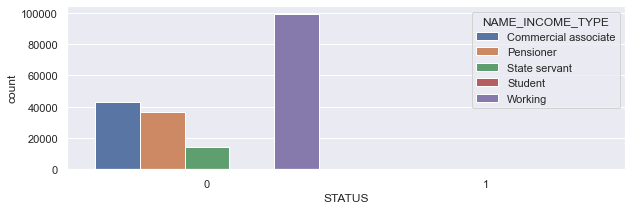

In [46]:
sns.countplot(x='STATUS',hue='NAME_INCOME_TYPE',data=df)
rcParams['figure.figsize'] = 25, 10


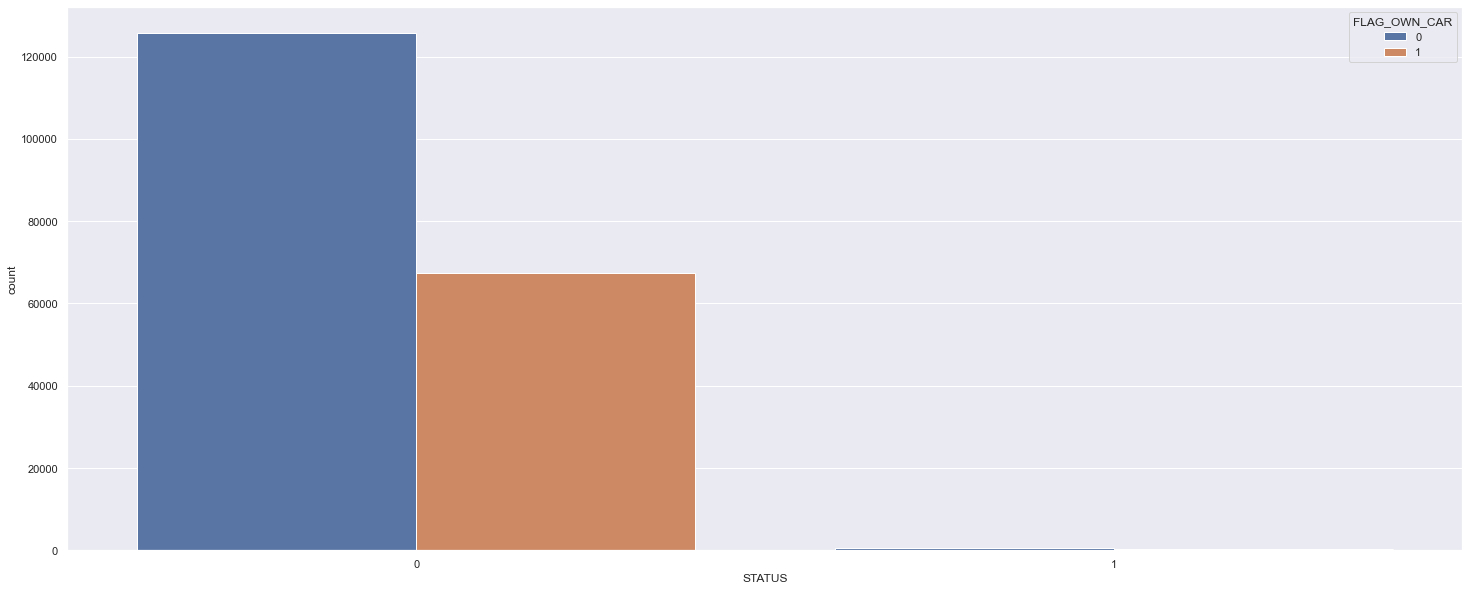

In [47]:
sns.countplot(x='STATUS',hue='FLAG_OWN_CAR',data=df)
rcParams['figure.figsize'] = 25, 10

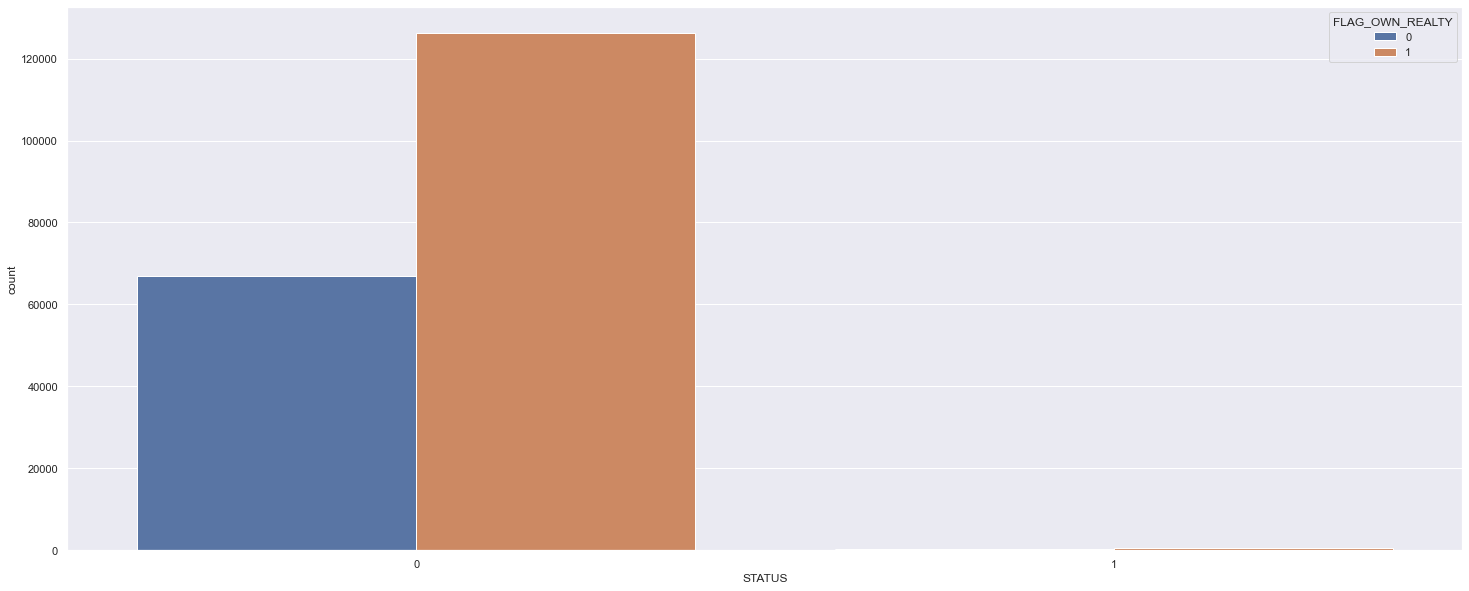

In [48]:
sns.countplot(x='STATUS',hue='FLAG_OWN_REALTY',data=df)
rcParams['figure.figsize'] = 25, 10

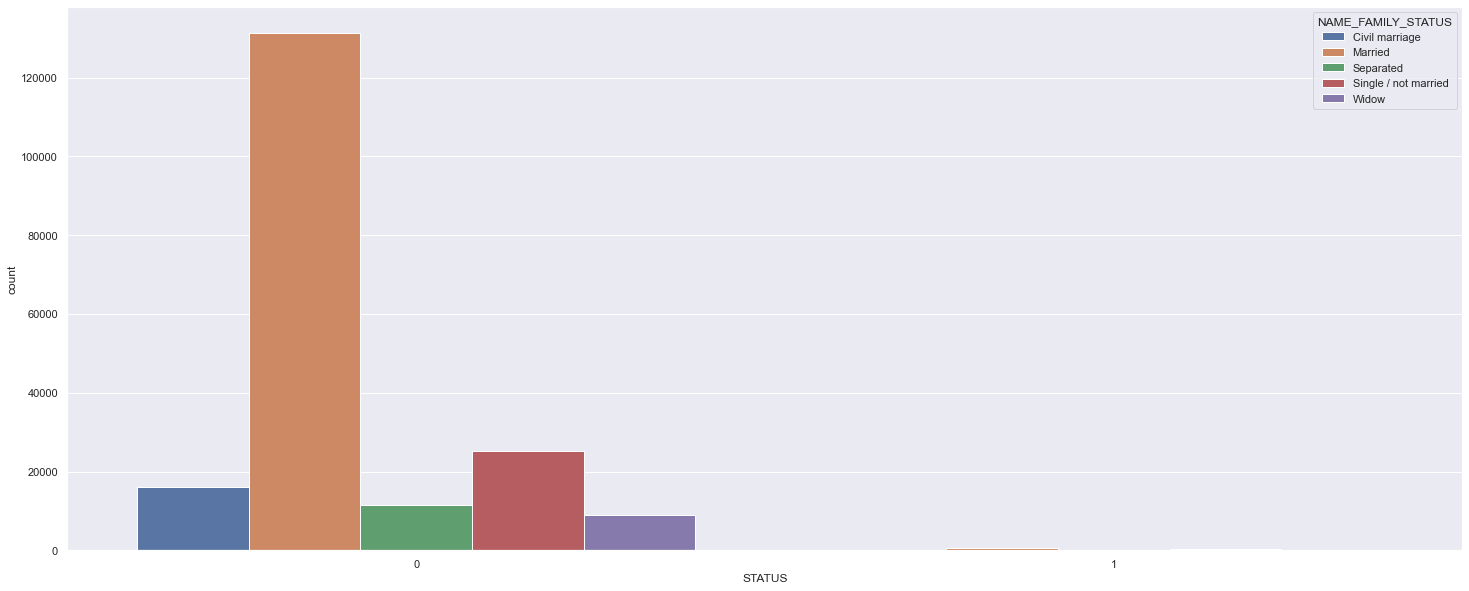

In [49]:
sns.countplot(x='STATUS',hue='NAME_FAMILY_STATUS',data=df)

rcParams['figure.figsize'] = 25, 10

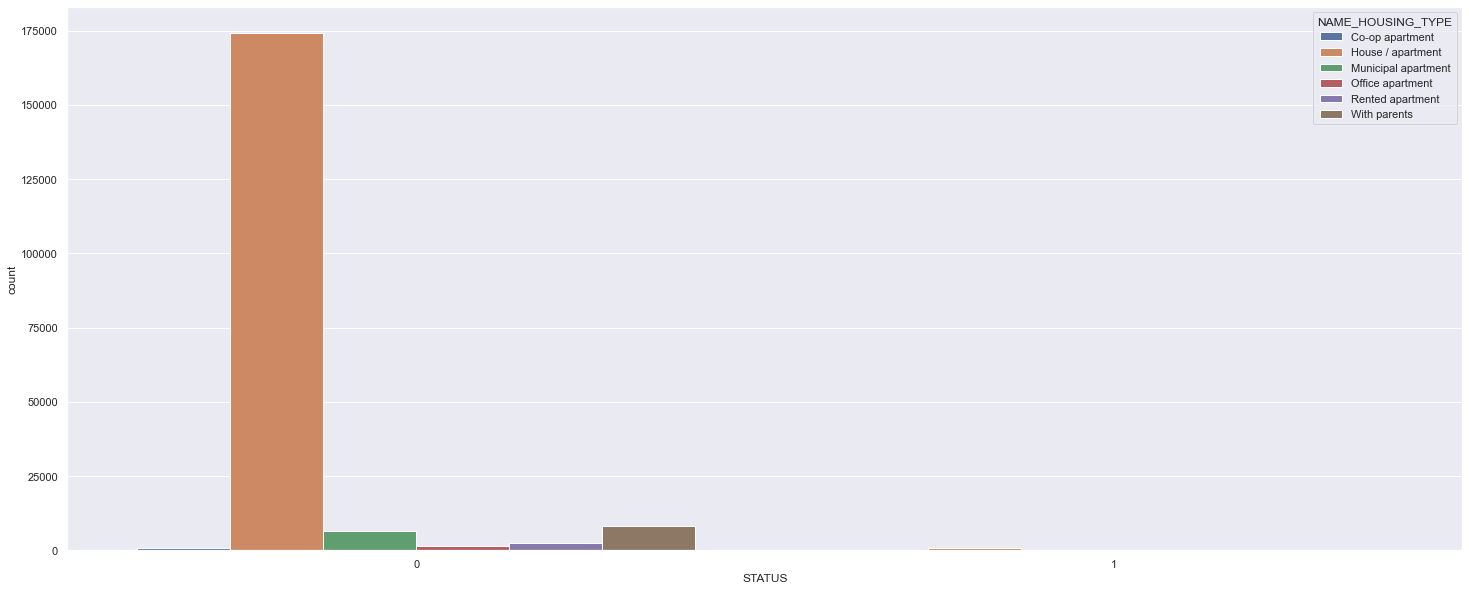

In [50]:
sns.countplot(x='STATUS',hue='NAME_HOUSING_TYPE',data=df)
rcParams['figure.figsize'] = 35,10

In [51]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
#we will use labelencoder to convert all the categorial columns
label_encoder = preprocessing.LabelEncoder()

In [52]:
df['CODE_GENDER']= label_encoder.fit_transform(df['CODE_GENDER'])
df['FLAG_OWN_CAR']= label_encoder.fit_transform(df['FLAG_OWN_CAR'])
df['FLAG_OWN_REALTY']= label_encoder.fit_transform(df['FLAG_OWN_REALTY'])
df['NAME_INCOME_TYPE']= label_encoder.fit_transform(df['NAME_INCOME_TYPE'])
df['NAME_FAMILY_STATUS']= label_encoder.fit_transform(df['NAME_FAMILY_STATUS'])
df['NAME_HOUSING_TYPE']= label_encoder.fit_transform(df['NAME_HOUSING_TYPE'])
df['NAME_EDUCATION_TYPE']= label_encoder.fit_transform(df['NAME_EDUCATION_TYPE'])

In [53]:
df.head()

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008806            1             1                1             0   
1  5008806            1             1                1             0   
2  5008806            1             1                1             0   
3  5008806            1             1                1             0   
4  5008806            1             1                1             0   

   AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0            112500                 4                    4   
1            112500                 4                    4   
2            112500                 4                    4   
3            112500                 4                    4   
4            112500                 4                    4   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                   1                  1      -21474          -1134   
1                   1                  1      -21474          -1134   
2                   1                  1      -21474          -1134   
3                   1                  1      -21474          -1134   
4                   1                  1      -21474          -1134   

   FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                0           0           0  Security staff                2   
1                0           0           0  Security staff                2   
2                0           0           0  Security staff                2   
3                0           0           0  Security staff                2   
4                0           0           0  Security staff                2   

   Age  MONTHS_BALANCE  STATUS  
0   58               0       0  
1   58              -1       0  
2   58              -2       0  
3   58              -3       0  
4   58              -4       0

### rename columns

In [54]:
df = df.rename(columns={'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Own_car', 
                               'FLAG_OWN_REALTY':'Own_property','CNT_CHILDREN':'Num_children',
                               'AMT_INCOME_TOTAL':'Total_income','NAME_INCOME_TYPE':'Income_type',
                               'NAME_EDUCATION_TYPE':'Education_type','NAME_FAMILY_STATUS':'Family_status',
                               'NAME_HOUSING_TYPE':'Housing_type','FLAG_WORK_PHONE':'Work_phone',
                               'FLAG_PHONE':'Phone','FLAG_EMAIL':'Email','OCCUPATION_TYPE':'Occupation_type',
                               'CNT_FAM_MEMBERS':'Num_family','target':'Target','ACCOUNT_LENGTH':'Account_length',
                                'AGE_YEARS':'Age','UNEMPLOYED':'Unemployed','YEARS_EMPLOYED':'Years_employed'})

In [56]:
cr= df.corr()
cr


ID    Gender   Own_car  Own_property  Num_children  \
ID              1.000000  0.016163  0.001458     -0.083486      0.021312   
Gender          0.016163  1.000000  0.366533     -0.053093      0.071734   
Own_car         0.001458  0.366533  1.000000     -0.002445      0.088082   
Own_property   -0.083486 -0.053093 -0.002445      1.000000     -0.001768   
Num_children    0.021312  0.071734  0.088082     -0.001768      1.000000   
Total_income   -0.019809  0.235691  0.200360      0.019890      0.046419   
Income_type     0.021451  0.089501  0.051076     -0.047154      0.119716   
Education_type  0.004078  0.026991 -0.062541      0.011811     -0.028518   
Family_status   0.008032 -0.089053 -0.131132      0.000628     -0.142247   
Housing_type    0.016233  0.045309 -0.009918     -0.176367      0.023903   
DAYS_BIRTH      0.040786  0.174403  0.139525     -0.130132      0.342300   
DAYS_EMPLOYED  -0.023025 -0.167908 -0.141652      0.083211     -0.231483   
Work_phone      0.081689  0.061273  0.027612     -0.178222      0.055346   
Phone          -0.001112 -0.029269 -0.007241     -0.030814     -0.031181   
Email          -0.046506 -0.000200  0.026260      0.053578      0.006047   
Num_family      0.014558  0.099270  0.141279      0.004048      0.888623   
Age            -0.040903 -0.173922 -0.139074      0.129725     -0.341816   
MONTHS_BALANCE  0.003189  0.015997 -0.001749     -0.007506      0.003569   
STATUS          0.019165  0.013636 -0.001389     -0.001250     -0.003440   

                Total_income  Income_type  Education_type  Family_status  \
ID                 -0.019809     0.021451        0.004078       0.008032   
Gender              0.235691     0.089501        0.026991      -0.089053   
Own_car             0.200360     0.051076       -0.062541      -0.131132   
Own_property        0.019890    -0.047154        0.011811       0.000628   
Num_children        0.046419     0.119716       -0.028518      -0.142247   
Total_income        1.000000    -0.004595       -0.177887       0.002680   
Income_type        -0.004595     1.000000        0.054174      -0.032398   
Education_type     -0.177887     0.054174        1.000000      -0.006550   
Family_status       0.002680    -0.032398       -0.006550       1.000000   
Housing_type       -0.002444     0.070853       -0.026607       0.032109   
DAYS_BIRTH          0.135561     0.229340       -0.156285      -0.102059   
DAYS_EMPLOYED      -0.202773    -0.387896        0.094700       0.122456   
Work_phone         -0.031605     0.147785        0.008866      -0.063180   
Phone              -0.019113     0.006912       -0.021635      -0.025519   
Email               0.067622     0.000084       -0.095840       0.000880   
Num_family          0.031701     0.105558       -0.015403      -0.522797   
Age                -0.135200    -0.229488        0.156330       0.101576   
MONTHS_BALANCE     -0.003323     0.002225       -0.008876       0.013002   
STATUS             -0.007441    -0.008426       -0.000269       0.025453   

                Housing_type  DAYS_BIRTH  DAYS_EMPLOYED  Work_phone     Phone  \
ID                  0.016233    0.040786      -0.023025    0.081689 -0.001112   
Gender              0.045309    0.174403      -0.167908    0.061273 -0.029269   
Own_car            -0.009918    0.139525      -0.141652    0.027612 -0.007241   
Own_property       -0.176367   -0.130132       0.083211   -0.178222 -0.030814   
Num_children        0.023903    0.342300      -0.231483    0.055346 -0.031181   
Total_income       -0.002444    0.135561      -0.202773   -0.031605 -0.019113   
Income_type         0.070853    0.229340      -0.387896    0.147785  0.006912   
Education_type     -0.026607   -0.156285       0.094700    0.008866 -0.021635   
Family_status       0.032109   -0.102059       0.122456   -0.063180 -0.025519   
Housing_type        1.000000    0.195013      -0.100003    0.033705 -0.019324   
DAYS_BIRTH          0.195013    1.000000      -0.625323    0.191973 -0.038737   
DAYS_EMP

<AxesSubplot:>

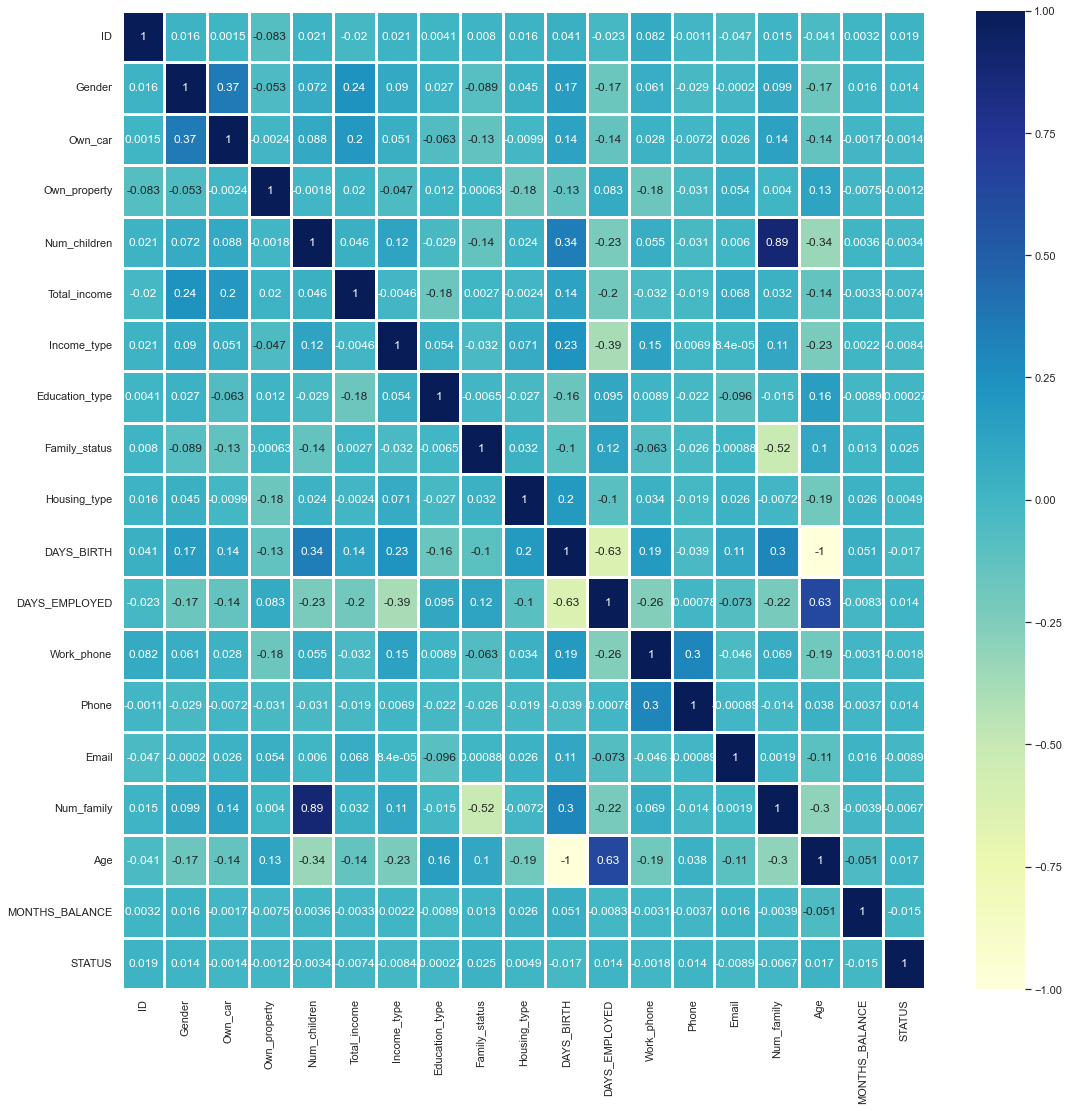

In [57]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),vmin=-1,cmap="YlGnBu",annot=True,linewidths=3)

In [58]:
# Save to csv
df.to_csv('clean_data.csv',index=False)

# PREDECTIVE ANALYSIS USING MACHINE LEARNING ALGORITHMS

## 1. LOGISTIC REGRESSION

In [63]:
df= pd.read_csv("clean_data.csv")
df.head()

ID  Gender  Own_car  Own_property  Num_children  Total_income  \
0  5008806       1        1             1             0        112500   
1  5008806       1        1             1             0        112500   
2  5008806       1        1             1             0        112500   
3  5008806       1        1             1             0        112500   
4  5008806       1        1             1             0        112500   

   Income_type  Education_type  Family_status  Housing_type  DAYS_BIRTH  \
0            4               4              1             1      -21474   
1            4               4              1             1      -21474   
2            4               4              1             1      -21474   
3            4               4              1             1      -21474   
4            4               4              1             1      -21474   

   DAYS_EMPLOYED  Work_phone  Phone  Email Occupation_type  Num_family  Age  \
0          -1134           0      0      0  Security staff           2   58   
1          -1134           0      0      0  Security staff           2   58   
2          -1134           0      0      0  Security staff           2   58   
3          -1134           0      0      0  Security staff           2   58   
4          -1134           0      0      0  Security staff           2   58   

   MONTHS_BALANCE  STATUS  
0               0       0  
1              -1       0  
2              -2       0  
3              -3       0  
4              -4       0

In [64]:
# Dropping ID
df= df.drop(['ID'], axis = 1)

print(df.shape)

(194080, 19)


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194080 entries, 0 to 194079
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Gender           194080 non-null  int64 
 1   Own_car          194080 non-null  int64 
 2   Own_property     194080 non-null  int64 
 3   Num_children     194080 non-null  int64 
 4   Total_income     194080 non-null  int64 
 5   Income_type      194080 non-null  int64 
 6   Education_type   194080 non-null  int64 
 7   Family_status    194080 non-null  int64 
 8   Housing_type     194080 non-null  int64 
 9   DAYS_BIRTH       194080 non-null  int64 
 10  DAYS_EMPLOYED    194080 non-null  int64 
 11  Work_phone       194080 non-null  int64 
 12  Phone            194080 non-null  int64 
 13  Email            194080 non-null  int64 
 14  Occupation_type  194080 non-null  object
 15  Num_family       194080 non-null  int64 
 16  Age              194080 non-null  int64 
 17  MONTHS_BAL

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X =np.array(df[['Gender', 'Own_car', 'Own_property','Income_type','Education_type', 'Family_status', 'Housing_type','Total_income','DAYS_EMPLOYED','MONTHS_BALANCE']])

In [68]:
y = np.array(df['STATUS'])

In [69]:
# Train & Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((130033, 10), (130033,), (64047, 10), (64047,))

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [71]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
report = classification_report(y_test, lr_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63776
           1       0.00      0.00      0.00       271

    accuracy                           1.00     64047
   macro avg       0.50      0.50      0.50     64047
weighted avg       0.99      1.00      0.99     64047



In [72]:
#testing the linear regression model
score=lr.score(X_test,y_test)

In [73]:
# Model diagnostic
print(score)

0.9957687323371899


In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
#CONFUSION MATRIX
print(confusion_matrix(y_test,lr_pred))

[[63776     0]
 [  271     0]]


In [76]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

#### ROC CURVE

[6.58506374e-04 1.70153581e-05 1.68630484e-05 ... 6.10162588e-05
 1.24172276e-02 1.66748857e-03]


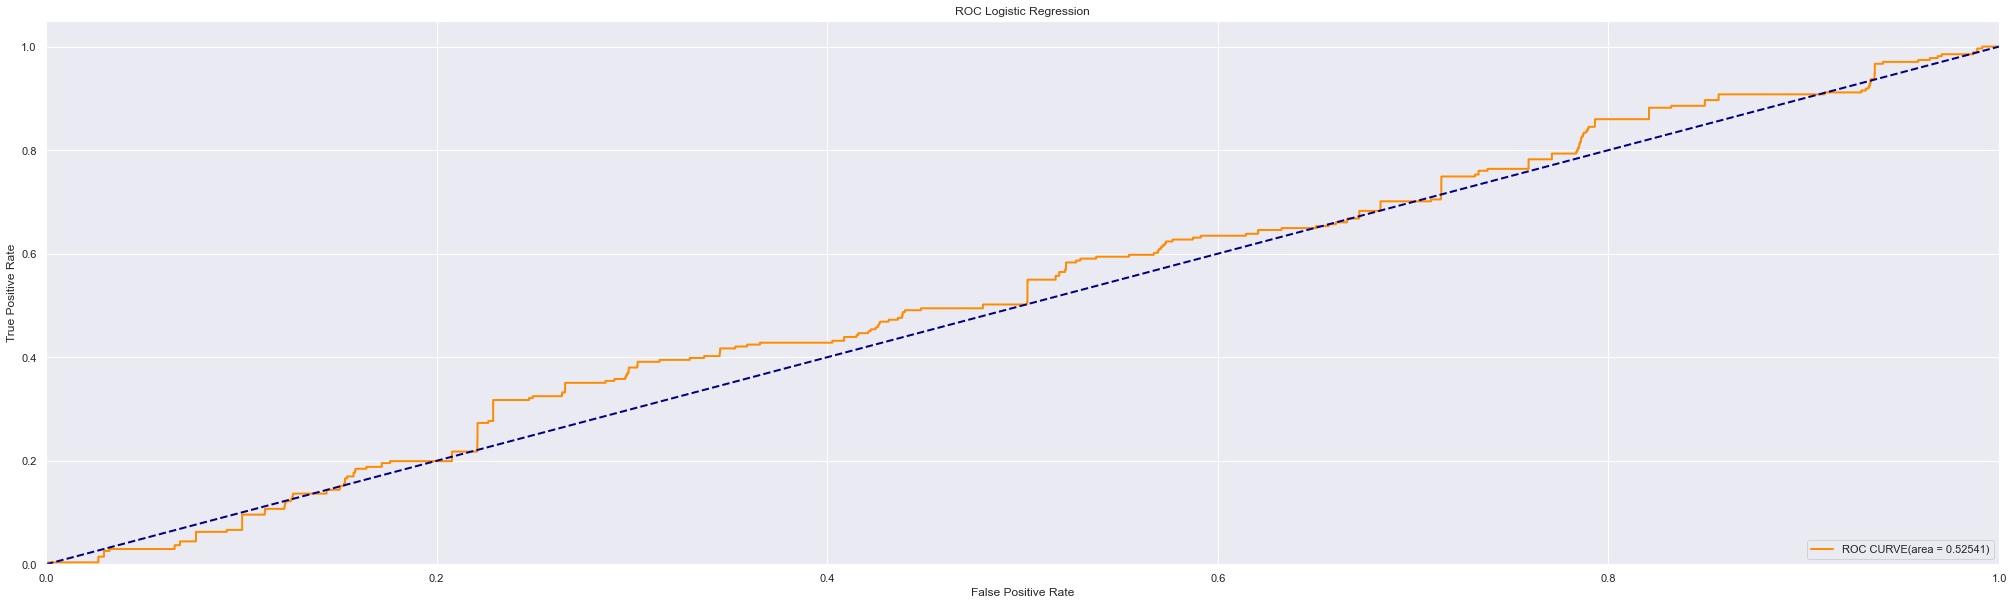

In [77]:
preds_lr = lr.predict_proba(X_test)[:,1]

print(preds_lr)

preds_lr.shape

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test,preds_lr)

fpr_lr

tpr_lr

thresholds_lr

df_lr = pd.DataFrame(dict(fpr = fpr_lr, tpr = tpr_lr))

auc_lr = roc_auc_score(y_test,preds_lr)

auc_lr

plt.figure()
lw =2 
plt.plot(fpr_lr, tpr_lr, color = 'darkorange', lw = lw, label = 'ROC CURVE(area = %0.5f)' % auc_lr)
plt.plot([0,1],[0,1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Logistic Regression')
plt.legend(loc = 'lower right')
plt.show()

# 2. K NEAREST NEIGBOUR (KNN)

In [78]:
# Splitting Data

X =np.array(df[['Gender', 'Own_car', 'Own_property','Income_type','Education_type', 'Family_status', 'Housing_type','Total_income','DAYS_EMPLOYED','MONTHS_BALANCE']])

In [79]:
y = np.array(df['STATUS'])

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [81]:
len(X_train)

130033

In [82]:
len(X_test)

64047

In [83]:
len(y_train)

130033

In [84]:
len(y_test)

64047

In [85]:
# Build KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 13)
knn
mod = knn.fit(X_train, y_train)
mod

KNeighborsClassifier(n_neighbors=13)

In [86]:
# Apply on test data

predictions = mod.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
pd.crosstab(y_test, predictions, margins = True)

col_0      0    1    All
row_0                   
0      63730   36  63766
1        214   67    281
All    63944  103  64047

In [88]:
accuracy=mod.score(X_test, y_test)
accuracy

0.9960966165472231

In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

In [90]:
print(accuracy_score(y_test, predictions))

0.9960966165472231


In [91]:
from sklearn.metrics import classification_report

In [92]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63766
           1       0.65      0.24      0.35       281

    accuracy                           1.00     64047
   macro avg       0.82      0.62      0.67     64047
weighted avg       1.00      1.00      1.00     64047



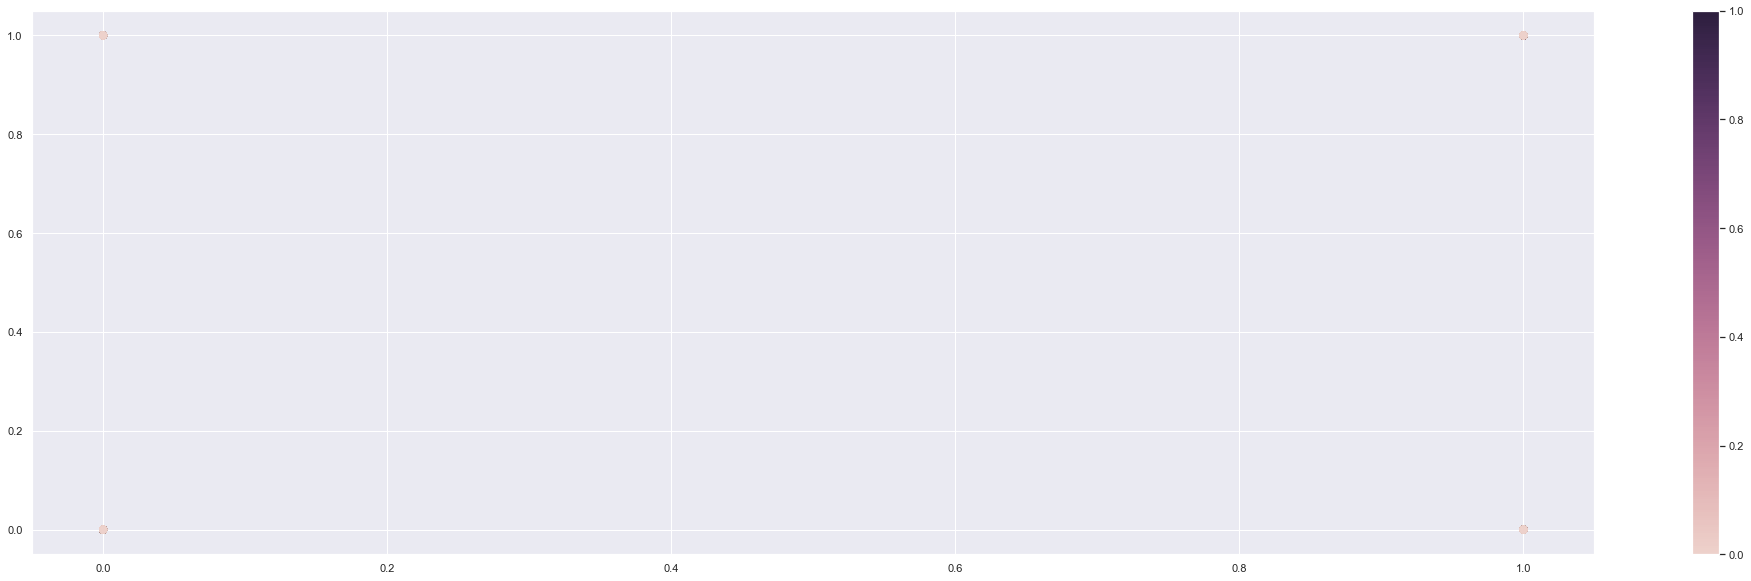

In [95]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter( X_test[:, 0], X_test[:, 1], c=predictions, s=50, cmap=cmap)
f.colorbar(points)
plt.show()


##### ROC CURVE

[0. 0. 0. ... 0. 0. 0.]


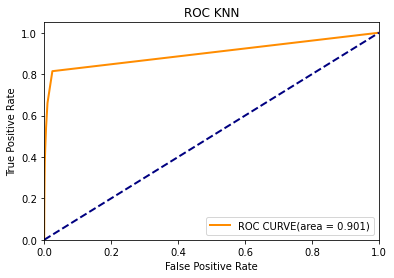

In [68]:
preds_knn1 = knn.predict_proba(X_test)[:,1]

print(preds_knn1)

preds_knn1.shape

fpr_knn1, tpr_knn1, thresholds_knn1 = roc_curve(y_test,preds_knn1)

df_knn1 = pd.DataFrame(dict(fpr = fpr_knn1, tpr = tpr_knn1))

auc_knn1 = roc_auc_score(y_test,preds_knn1)

plt.figure()
lw =2 
plt.plot(fpr_knn1, tpr_knn1, color = 'darkorange', lw = lw, label = 'ROC CURVE(area = %0.3f)' % auc_knn1)
plt.plot([0,1],[0,1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC KNN')
plt.legend(loc = 'lower right')
plt.show()

## 3. SUPPORT VECTOR MACHINE (SVM)

In [69]:
# Splitting Data

X =df[['Gender', 'Own_car', 'Own_property','Income_type','Education_type', 'Family_status', 'Housing_type','MONTHS_BALANCE']]

In [70]:
X.head()

Gender  Own_car  Own_property  Income_type  Education_type  Family_status  \
0       1        1             1            4               4              1   
1       1        1             1            4               4              1   
2       1        1             1            4               4              1   
3       1        1             1            4               4              1   
4       1        1             1            4               4              1   

   Housing_type  MONTHS_BALANCE  
0             1               0  
1             1              -1  
2             1              -2  
3             1              -3  
4             1              -4

In [71]:
y = df['STATUS']

In [72]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: STATUS, dtype: int64

In [73]:
ref = X

In [74]:
ref.shape

(194080, 8)

In [75]:
ref.head()

Gender  Own_car  Own_property  Income_type  Education_type  Family_status  \
0       1        1             1            4               4              1   
1       1        1             1            4               4              1   
2       1        1             1            4               4              1   
3       1        1             1            4               4              1   
4       1        1             1            4               4              1   

   Housing_type  MONTHS_BALANCE  
0             1               0  
1             1              -1  
2             1              -2  
3             1              -3  
4             1              -4

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state=0) 

In [77]:
len(X_train)

116448

In [78]:
X_train.head(3)

Gender  Own_car  Own_property  Income_type  Education_type  \
112977       0        0             1            0               1   
98326        0        0             1            4               1   
176531       0        0             1            0               4   

        Family_status  Housing_type  MONTHS_BALANCE  
112977              1             1             -32  
98326               1             1             -28  
176531              1             1              -8

In [79]:
len(X_test)

77632

In [80]:
X_test.head(3)

Gender  Own_car  Own_property  Income_type  Education_type  \
165397       0        0             1            0               4   
34611        0        1             0            4               4   
79929        0        1             1            0               4   

        Family_status  Housing_type  MONTHS_BALANCE  
165397              3             1             -16  
34611               1             1             -14  
79929               1             1              -9

In [81]:
len(y_train)

116448

In [82]:
y_train.head(3)

112977    0
98326     0
176531    0
Name: STATUS, dtype: int64

In [83]:
len(y_test)

77632

In [84]:
y_test.head(3)

165397    0
34611     0
79929     0
Name: STATUS, dtype: int64

#### Building model on training set

In [85]:
from sklearn import svm

In [86]:
svcT = svm.SVC(kernel = 'linear', C =1, gamma = 'auto', probability = True). fit(X_train, y_train)

In [87]:
print(svcT)

SVC(C=1, gamma='auto', kernel='linear', probability=True)


In [88]:
y_pred = svcT.predict(X_test)

In [89]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [92]:
confusion_matrix

array([[77249,     0],
       [  383,     0]], dtype=int64)

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77249
           1       0.00      0.00      0.00       383

    accuracy                           1.00     77632
   macro avg       0.50      0.50      0.50     77632
weighted avg       0.99      1.00      0.99     77632



In [94]:
# ROC Curve

preds1 = svcT.predict_proba(X_test)[:,1]

In [95]:
print(preds1)

[0.00395741 0.0041827  0.00403644 ... 0.00415902 0.00389919 0.00439536]


In [96]:
preds1.shape

(77632,)

In [97]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [98]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test,preds1 )

In [99]:
df1 = pd.DataFrame(dict(fpr = fpr1, tpr = tpr1))

In [100]:
auc = metrics.auc(fpr1, tpr1)

#### ROC CURVE

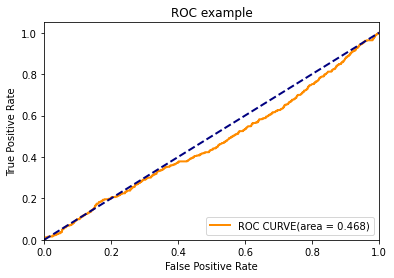

In [101]:
plt.figure()
lw =2 
plt.plot(fpr1, tpr1, color = 'darkorange', lw = lw, label = 'ROC CURVE(area = %0.3f)' % auc)
plt.plot([0,1],[0,1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC example')
plt.legend(loc = 'lower right')
plt.show()

## 4. DECISION TREE

In [102]:
X =np.array(df[['Gender', 'Own_car', 'Own_property','Income_type','Education_type', 'Family_status', 'Housing_type','Total_income','DAYS_EMPLOYED','MONTHS_BALANCE']])

In [103]:
y = np.array(df['STATUS'])

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

#### We'll start just by training a single decision tree.

In [105]:
from sklearn.tree import DecisionTreeClassifier 
dtree = DecisionTreeClassifier()

In [106]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

Prediction and Evaluation

Let's evaluate our decision tree.

In [107]:
predictions = dtree.predict(X_test)

In [108]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63780
           1       0.56      0.59      0.57       267

    accuracy                           1.00     64047
   macro avg       0.78      0.79      0.79     64047
weighted avg       1.00      1.00      1.00     64047



In [109]:
print(confusion_matrix(y_test,predictions))

[[63655   125]
 [  110   157]]


#### Tree Visualisation

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [110]:
import pydotplus

In [111]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus,graphviz

# Putting features
features = list(df[['Gender', 'Own_car', 'Own_property','Income_type','Education_type', 'Family_status', 'Housing_type','Total_income','DAYS_EMPLOYED','MONTHS_BALANCE']])

features

['Gender',
 'Own_car',
 'Own_property',
 'Income_type',
 'Education_type',
 'Family_status',
 'Housing_type',
 'Total_income',
 'DAYS_EMPLOYED',
 'MONTHS_BALANCE']

In [112]:
import pydot

In [113]:
dot_data = StringIO()  
cc=export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

#### ROC CURVE

[0. 0. 0. ... 0. 0. 0.]


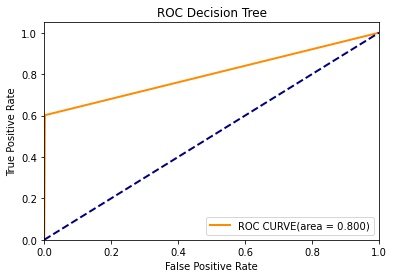

In [114]:
preds_dc = dtree.predict_proba(X_test)[:,1]

print(preds_dc)

preds_dc.shape

fpr_dc, tpr_dc, thresholds_dc = roc_curve(y_test,preds_dc)

fpr_dc

tpr_dc

thresholds_dc

df_dc = pd.DataFrame(dict(fpr = fpr_dc, tpr = tpr_dc))

auc_dc = roc_auc_score(y_test, preds_dc)

auc_dc

plt.figure()
lw =2 
plt.plot(fpr_dc, tpr_dc, color = 'darkorange', lw = lw, label = 'ROC CURVE(area = %0.3f)' % auc_dc)
plt.plot([0,1],[0,1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Decision Tree')
plt.legend(loc = 'lower right')
plt.show()

## 5. RANDOM FOREST

Now let's compare the decision tree model to a random forest

In [118]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [119]:
rfc_pred = rfc.predict(X_test)

In [120]:
print(confusion_matrix(y_test,rfc_pred))

[[63726    54]
 [  121   146]]


In [121]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63780
           1       0.73      0.55      0.63       267

    accuracy                           1.00     64047
   macro avg       0.86      0.77      0.81     64047
weighted avg       1.00      1.00      1.00     64047



[0. 0. 0. ... 0. 0. 0.]


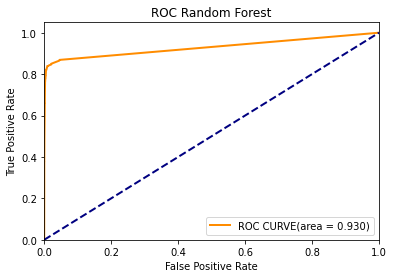

In [122]:
preds_rf = rfc.predict_proba(X_test)[:,1]

print(preds_rf)

preds_rf.shape

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test,preds_rf)

fpr_rf

tpr_rf

thresholds_rf

df_rf = pd.DataFrame(dict(fpr = fpr_rf, tpr = tpr_rf))

auc_rf = roc_auc_score(y_test,preds_rf)

auc_rf

plt.figure()
lw =2 
plt.plot(fpr_rf, tpr_rf, color = 'darkorange', lw = lw, label = 'ROC CURVE(area = %0.3f)' % auc_rf)
plt.plot([0,1],[0,1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Random Forest')
plt.legend(loc = 'lower right')
plt.show()

#### ROC CURVE

## 6. AIRTIFICIAL NEURAL NETWORK (ANN)

In [123]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((130033, 10), (64047, 10), (130033,), (64047,))

In [124]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [125]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU

In [126]:
# kernel_initializer ---> For initialising weights 

# batch_size----> Number of samples that will be passed through the network at one time.

# Higher the batch size, more memory space is needed.

# epochs----> Training the neural network with all the training data for one cycle.

#Initialising the ANN
classifier = Sequential()

#Adding the input layer and first hidden layer
classifier.add(Dense(units=64, kernel_initializer ='he_uniform', activation='relu', input_dim = 10))

#Adding the second Hidden layer
classifier.add(Dense(units=32, kernel_initializer ='he_uniform', activation='relu'))

#Adding the output layer
classifier.add(Dense(units=1, kernel_initializer ='glorot_uniform', activation='sigmoid'))

#Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to training set
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 50, epochs = 100)

Epoch 1/100
1743/1743 [==============================] - 2s 1ms/step - loss: 0.0294 - accuracy: 0.9955 - val_loss: 0.0269 - val_accuracy: 0.9954
Epoch 2/100
1743/1743 [==============================] - 2s 1ms/step - loss: 0.0263 - accuracy: 0.9955 - val_loss: 0.0262 - val_accuracy: 0.9954
Epoch 3/100
1743/1743 [==============================] - 2s 1ms/step - loss: 0.0255 - accuracy: 0.9955 - val_loss: 0.0257 - val_accuracy: 0.9954
Epoch 4/100
1743/1743 [==============================] - 2s 1ms/step - loss: 0.0246 - accuracy: 0.9954 - val_loss: 0.0254 - val_accuracy: 0.9954
Epoch 5/100
1743/1743 [==============================] - 2s 1ms/step - loss: 0.0241 - accuracy: 0.9955 - val_loss: 0.0242 - val_accuracy: 0.9954
Epoch 6/100
1743/1743 [==============================] - 2s 1ms/step - loss: 0.0236 - accuracy: 0.9954 - val_loss: 0.0244 - val_accuracy: 0.9955
Epoch 7/100
1743/1743 [==============================] - 2s 1ms/step - loss: 0.0230 - accuracy: 0.9955 - val_loss: 0.0249 - val_ac

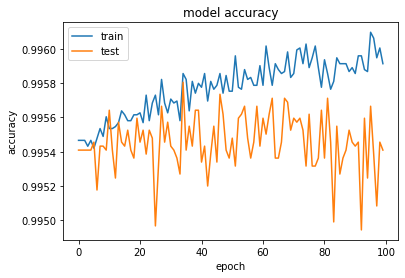

In [127]:
#summarize the history of accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

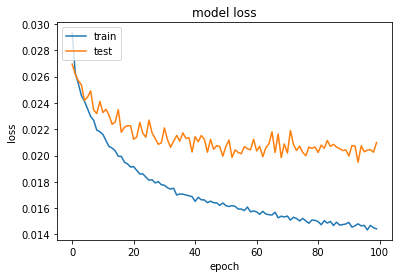

In [128]:
#summarize the history of loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [129]:
#predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

In [130]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[63737,   222],
       [   43,    45]], dtype=int64)

In [131]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.9958624135400566

In [132]:
report = classification_report(y_pred, y_test)
print(report)


              precision    recall  f1-score   support

       False       1.00      1.00      1.00     63959
        True       0.17      0.51      0.25        88

    accuracy                           1.00     64047
   macro avg       0.58      0.75      0.63     64047
weighted avg       1.00      1.00      1.00     64047



#### Comparing the accuracy of all the ML algorithms and plotting barplot

<AxesSubplot:>

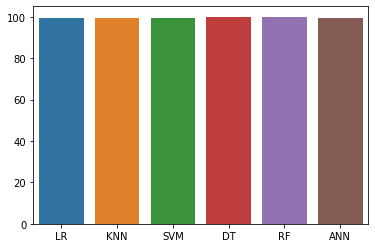

In [2]:
lx = ['LR','KNN','SVM','DT','RF','ANN']
ly = [99.56 , 99.62 , 99.51 , 99.63 ,100, 99.58]
sns.barplot(x=lx,y=ly)


# CONCLUSION


Hereby we conclude that  Random Forest Approach is best algorithm of predicting the credit card sales with higher accuracy , recall value and ROC curve area .

We also found that in further we need to use this algorithm for the future and we will use for different datasets that is related to credit card sales.
